In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings # supress warnings 
warnings.filterwarnings('ignore')

# **Data Preprocessing**

In [ ]:
data_NYISO = pd.read_csv('Data.csv',low_memory=False)
data_NYISO['DateTime']=pd.to_datetime(data_NYISO.DateTime)
# add day, month, year, hour, minute, day of the week
data_NYISO['Year'] = data_NYISO['DateTime'].dt.year
data_NYISO['Month'] = data_NYISO['DateTime'].dt.month
data_NYISO['Day'] = data_NYISO['DateTime'].dt.day
data_NYISO['Hour'] = data_NYISO['DateTime'].dt.hour
data_NYISO['Minute'] = data_NYISO['DateTime'].dt.minute
data_NYISO["dayofweek"] = data_NYISO['DateTime'].dt.dayofweek
data_NYISO = data_NYISO.set_index(['DateTime'])
data_NYISO.head()

,ZoneName,Load,RT_LMP,RT_MCL,RT_MCC,DA_LMP,DA_MCL,DA_MCC,T2M,T2MDEW,...,WD10M,WS50M,WD50M,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX
DateTime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,Capital,1230.490067,46.919167,0.269167,-43.240833,25.72,0.86,-12.31,-4.74,-4.38,...,323.19,3.20,323.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 01:00:00,Capital,1199.764783,34.924167,-0.165000,-37.286667,23.41,0.78,-10.80,-5.17,-4.77,...,333.58,2.69,332.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 02:00:00,Capital,1172.361075,23.151667,-0.055000,-23.922500,22.25,0.82,-9.26,-5.45,-5.14,...,339.56,2.15,338.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 03:00:00,Capital,1164.461967,29.398333,-0.073333,-30.407500,22.00,0.81,-8.75,-5.74,-5.45,...,345.22,1.90,344.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 04:00:00,Capital,1177.303475,32.660833,-0.155000,-34.841667,22.73,0.68,-11.74,-6.02,-5.74,...,343.59,1.73,342.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = data_NYISO[data_NYISO.ZoneName=='New York City'].drop('ZoneName', axis=1)
df.head()

,Load,RT_LMP,RT_MCL,RT_MCC,DA_LMP,DA_MCL,DA_MCC,T2M,T2MDEW,T2MWET,...,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,Year,Month,Day,Hour,Minute,dayofweek
DateTime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,4915.3086,26.08,2.26,0.00,22.88,1.29,-9.05,1.95,-0.59,0.68,...,0.0,0.0,0.0,0.0,2021,1,1,0,0,4
2021-01-01 00:05:00,4892.8174,29.15,2.38,0.00,22.88,1.29,-9.05,1.95,-0.59,0.68,...,0.0,0.0,0.0,0.0,2021,1,1,0,5,4
2021-01-01 00:10:00,4868.1533,53.87,1.06,-40.86,22.88,1.29,-9.05,1.95,-0.59,0.68,...,0.0,0.0,0.0,0.0,2021,1,1,0,10,4
2021-01-01 00:15:00,4856.5923,36.92,1.10,-23.80,22.88,1.29,-9.05,1.95,-0.59,0.68,...,0.0,0.0,0.0,0.0,2021,1,1,0,15,4
2021-01-01 00:20:00,4829.3720,32.00,0.90,-21.37,22.88,1.29,-9.05,1.95,-0.59,0.68,...,0.0,0.0,0.0,0.0,2021,1,1,0,20,4


In [ ]:
# relocate the target variable to the last column
df = df.reindex(columns = [col for col in df.columns if col != 'RT_LMP'] + ['RT_LMP'])
df.head()

,Load,RT_MCL,RT_MCC,DA_LMP,DA_MCL,DA_MCC,T2M,T2MDEW,T2MWET,QV2M,...,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,Year,Month,Day,Hour,Minute,dayofweek,RT_LMP
DateTime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,4915.3086,2.26,0.00,22.88,1.29,-9.05,1.95,-0.59,0.68,3.54,...,0.0,0.0,0.0,2021,1,1,0,0,4,26.08
2021-01-01 00:05:00,4892.8174,2.38,0.00,22.88,1.29,-9.05,1.95,-0.59,0.68,3.54,...,0.0,0.0,0.0,2021,1,1,0,5,4,29.15
2021-01-01 00:10:00,4868.1533,1.06,-40.86,22.88,1.29,-9.05,1.95,-0.59,0.68,3.54,...,0.0,0.0,0.0,2021,1,1,0,10,4,53.87
2021-01-01 00:15:00,4856.5923,1.10,-23.80,22.88,1.29,-9.05,1.95,-0.59,0.68,3.54,...,0.0,0.0,0.0,2021,1,1,0,15,4,36.92
2021-01-01 00:20:00,4829.3720,0.90,-21.37,22.88,1.29,-9.05,1.95,-0.59,0.68,3.54,...,0.0,0.0,0.0,2021,1,1,0,20,4,32.00


# **Data Prepration**

## **3D Data**

In [ ]:
TRAIN_SPLIT=int(len(df)*0.6)
VALID_SPLIT=int(len(df)*0.2)
df_array=np.array(df)

In [ ]:
def multivariate_data(df, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(df) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(df[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

In [ ]:
past_history = 10
STEP = 1 #stride #do not change 
n_step=1 #target_len

x_train_multi, y_train_multi= multivariate_data(df_array, df_array[:,-1], 
                                                0, TRAIN_SPLIT,
                                                past_history, 
                                                n_step, STEP, 
                                                single_step=False)

x_valid_multi, y_valid_multi = multivariate_data(df_array, df_array[:,-1],
                                                 TRAIN_SPLIT,
                                                 TRAIN_SPLIT+VALID_SPLIT,
                                                 past_history,
                                                 n_step, 
                                                 STEP,
                                                 single_step=False)

x_test_multi, y_test_multi = multivariate_data(df_array, df_array[:,-1],
                                               TRAIN_SPLIT+VALID_SPLIT,
                                               None, past_history,
                                               n_step, STEP,
                                               single_step=False)

In [ ]:
print(x_train_multi.shape)
print(x_valid_multi.shape)
print(x_test_multi.shape)

(508, 10, 31)
(162, 10, 31)
(163, 10, 31)


In [ ]:
print(y_train_multi.shape)
print(y_valid_multi.shape)
print(y_test_multi.shape)

(508, 1)
(162, 1)
(163, 1)


## **Data Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scalers = {}
for i in range(x_train_multi.shape[1]):
    scalers [i]= MinMaxScaler(feature_range=(0,1))
    x_train_multi[:, i, :] = scalers[i].fit_transform(x_train_multi[:, i, :]) 

for i in range(x_valid_multi.shape[1]):
    x_valid_multi[:, i, :] = scalers[i].transform(x_valid_multi[:, i, :]) 

for i in range(x_test_multi.shape[1]):
    x_test_multi[:, i, :] = scalers[i].transform(x_test_multi[:, i, :]) 
print(x_train_multi.shape)
print(x_valid_multi.shape)
print(x_test_multi.shape)

(508, 10, 31)
(162, 10, 31)
(163, 10, 31)


In [ ]:
scaler_y =MinMaxScaler(feature_range=(0,1))
y_train_multi=scaler_y.fit_transform(y_train_multi)
y_valid_multi=scaler_y.transform(y_valid_multi)
y_test_multi=scaler_y.transform(y_test_multi)
print(y_train_multi.shape)
print(y_valid_multi.shape)
print(y_test_multi.shape)

(508, 1)
(162, 1)
(163, 1)


In [ ]:
y_test_multi_inv=scaler_y.inverse_transform(y_test_multi)
print(y_test_multi_inv.shape)

(163, 1)


## **2D Data**

In [ ]:
x_train_multi_2d=x_train_multi.reshape(x_train_multi.shape[0],
                                       x_train_multi.shape[1]*x_train_multi.shape[2])
x_valid_multi_2d=x_valid_multi.reshape(x_valid_multi.shape[0],
                                       x_valid_multi.shape[1]*x_valid_multi.shape[2])
x_test_multi_2d=x_test_multi.reshape(x_test_multi.shape[0],
                                     x_test_multi.shape[1]*x_test_multi.shape[2])
print(x_train_multi_2d.shape)
print(x_valid_multi_2d.shape)
print(x_test_multi_2d.shape)

(508, 310)
(162, 310)
(163, 310)


# **Deep Learning Models**

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU, SimpleRNN, Conv1D, MaxPooling1D, Flatten, Dropout
import tensorflow as tf
from sklearn.metrics import mean_squared_error

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3) # early_stopping

##**MLP**

In [ ]:
MLP_model = Sequential()
MLP_model.add(Dense(100, activation='relu', input_dim=x_train_multi_2d.shape[1]))
MLP_model.add(Dense(60, activation='relu'))
MLP_model.add(Dense(40, activation='relu'))
MLP_model.add(Dense(40, activation='relu'))
MLP_model.add(Dense(40, activation='relu'))
MLP_model.add(Dense(50, activation='relu'))
MLP_model.add(Dense(n_step,activation='selu'))
MLP_model.compile(loss='mse', optimizer='adam')

In [ ]:
history_MLP=MLP_model.fit(x_train_multi_2d,
                          y_train_multi,
                          epochs=50,
                          batch_size=16,
                          validation_data=(x_valid_multi_2d,y_valid_multi),
                          callbacks=[callback]) # callback is for the early_stopping

Epoch 1/50
32/32 [==============================] - 2s 30ms/step - loss: 0.0074 - val_loss: 0.0058
Epoch 2/50
32/32 [==============================] - 0s 7ms/step - loss: 0.0052 - val_loss: 6.1006e-04
Epoch 3/50
32/32 [==============================] - 0s 9ms/step - loss: 0.0051 - val_loss: 0.0013
Epoch 4/50
32/32 [==============================] - 0s 10ms/step - loss: 0.0048 - val_loss: 6.3783e-04
Epoch 5/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0050 - val_loss: 7.0517e-04


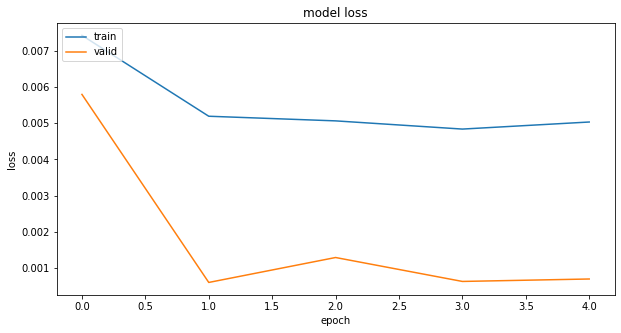

In [ ]:
# Learning curve
plt.figure(figsize=(10, 5))
plt.plot(history_MLP.history['loss'])
plt.plot(history_MLP.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
predict_MLP=MLP_model.predict(x_test_multi_2d)
mse_MLP= mean_squared_error(y_test_multi, predict_MLP)
print(predict_MLP.shape)
print(mse_MLP)

(163, 1)
0.0022454524917673905


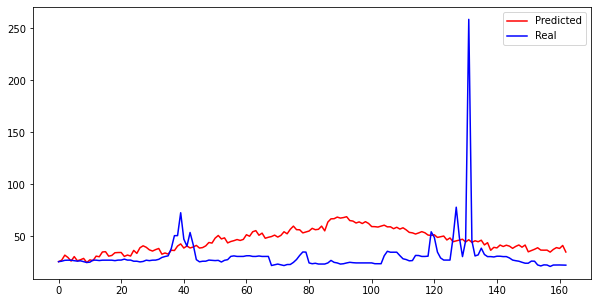

In [ ]:
predict_MLP_inv=scaler_y.inverse_transform(predict_MLP)
fig = plt.figure(figsize = (10, 5))
plt.plot(predict_MLP_inv[:,0], color='r', label='Predicted')
plt.plot(y_test_multi_inv[:,0], color='b', label='Real')
plt.legend()

##**Simple RNN**

In [ ]:
RNN_model = Sequential()
RNN_model.add(SimpleRNN(50, input_shape=x_train_multi.shape[-2:], activation='relu', return_sequences=True))
# RNN_model.add(Dropout(0.3))
RNN_model.add(SimpleRNN(50, activation='relu', kernel_regularizer='l2'))
RNN_model.add(Dropout(0.3))
RNN_model.add(Dense(n_step,activation='selu'))
RNN_model.compile(optimizer='adam', loss='mse')

In [ ]:
history_RNN=RNN_model.fit(x_train_multi,
                          y_train_multi,
                          epochs=50,
                          batch_size=16,
                          validation_data=(x_valid_multi,y_valid_multi),
                          callbacks=[callback])

Epoch 1/50
32/32 [==============================] - 2s 19ms/step - loss: 0.5907 - val_loss: 0.4510
Epoch 2/50
32/32 [==============================] - 0s 8ms/step - loss: 0.4031 - val_loss: 0.3736
Epoch 3/50
32/32 [==============================] - 0s 8ms/step - loss: 0.3230 - val_loss: 0.3013
Epoch 4/50
32/32 [==============================] - 0s 9ms/step - loss: 0.2652 - val_loss: 0.2544
Epoch 5/50
32/32 [==============================] - 0s 8ms/step - loss: 0.2188 - val_loss: 0.2096
Epoch 6/50
32/32 [==============================] - 0s 8ms/step - loss: 0.1842 - val_loss: 0.1753
Epoch 7/50
32/32 [==============================] - 0s 9ms/step - loss: 0.1565 - val_loss: 0.1479
Epoch 8/50
32/32 [==============================] - 0s 8ms/step - loss: 0.1343 - val_loss: 0.1278
Epoch 9/50
32/32 [==============================] - 0s 8ms/step - loss: 0.1159 - val_loss: 0.1105
Epoch 10/50
32/32 [==============================] - 0s 8ms/step - loss: 0.1013 - val_loss: 0.0979
Epoch 11/50
32/32 

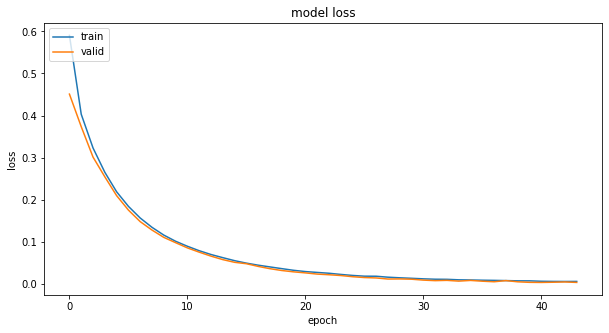

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_RNN.history['loss'])
plt.plot(history_RNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
predict_RNN=RNN_model.predict(x_test_multi)
mse_RNN= mean_squared_error(y_test_multi, predict_RNN)
print(predict_RNN.shape)
print(mse_RNN)

(163, 1)
0.00785145170529443


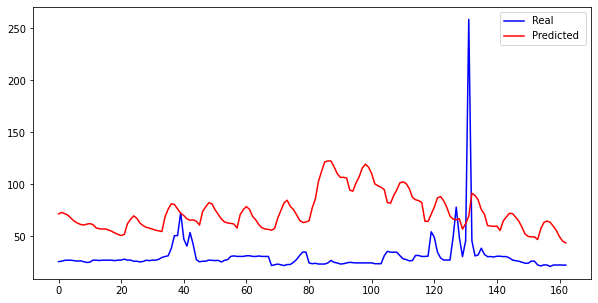

In [ ]:
predict_RNN_inv=scaler_y.inverse_transform(predict_RNN)
fig = plt.figure(figsize = (10, 5))
plt.plot(y_test_multi_inv[:, 0], color='b', label='Real ')
plt.plot(predict_RNN_inv[:, 0], color='r', label='Predicted ')
plt.legend()

##**LSTM**

In [ ]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(50, input_shape=x_train_multi.shape[-2:], activation='relu', return_sequences=True))
# LSTM_model.add(Dropout(0.3))
LSTM_model.add(LSTM(50, activation='relu', return_sequences=True))
# LSTM_model.add(Dropout(0.3))
LSTM_model.add(LSTM(50, activation='relu'))
LSTM_model.add(Dropout(0.3))
LSTM_model.add(Dense(n_step, activation='selu'))
LSTM_model.compile(optimizer='adam', loss='mse')

In [ ]:
history_LSTM=LSTM_model.fit(x_train_multi,
                            y_train_multi,
                            epochs=50,
                            batch_size=16,
                            validation_data=(x_valid_multi, y_valid_multi),
                            callbacks=[callback])

Epoch 1/50
32/32 [==============================] - 5s 35ms/step - loss: 0.0062 - val_loss: 3.9220e-04
Epoch 2/50
32/32 [==============================] - 1s 19ms/step - loss: 0.0054 - val_loss: 6.9944e-04
Epoch 3/50
32/32 [==============================] - 1s 19ms/step - loss: 0.0051 - val_loss: 3.9271e-04
Epoch 4/50
32/32 [==============================] - 1s 19ms/step - loss: 0.0050 - val_loss: 0.0019


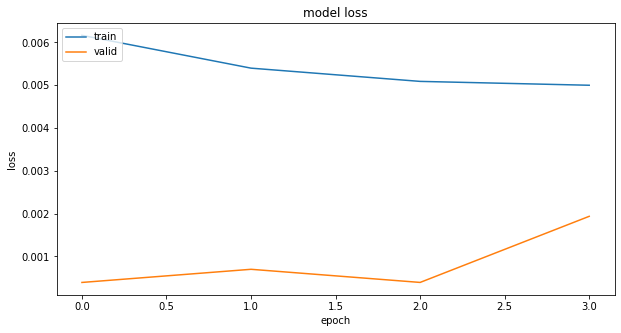

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
predict_LSTM=LSTM_model.predict(x_test_multi)
mse_LSTM= mean_squared_error(y_test_multi, predict_LSTM)
print(predict_LSTM.shape)
print(mse_LSTM)

(163, 1)
0.0014758389471010486


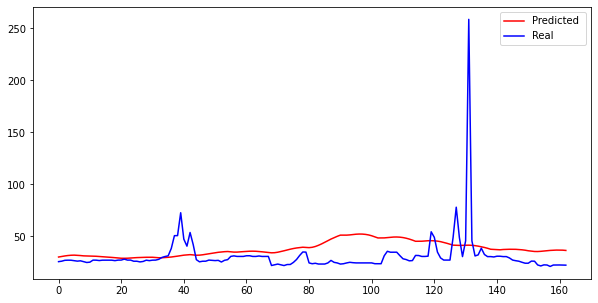

In [ ]:
predict_LSTM_inv=scaler_y.inverse_transform(predict_LSTM)
fig = plt.figure(figsize = (10, 5))
plt.plot(predict_LSTM_inv[:, 0], color='r', label='Predicted ')
plt.plot(y_test_multi_inv[:, 0], color='b', label='Real ')
plt.legend()

##**GRU**

In [ ]:
GRU_model = Sequential()
GRU_model.add(GRU(50,input_shape=x_train_multi.shape[-2:],activation='relu',return_sequences=True))
# GRU_model.add(Dropout(0.3))
GRU_model.add(GRU(50,activation='relu'))
GRU_model.add(Dropout(0.3))
GRU_model.add(Dense(n_step,activation='selu'))
GRU_model.compile(optimizer='adam', loss='mse')

In [ ]:
history_GRU=GRU_model.fit(x_train_multi,
                          y_train_multi,
                          epochs=50,
                          batch_size=16,
                          validation_data=(x_valid_multi,y_valid_multi),
                          callbacks=[callback])

Epoch 1/50
32/32 [==============================] - 4s 26ms/step - loss: 0.0159 - val_loss: 0.0016
Epoch 2/50
32/32 [==============================] - 0s 15ms/step - loss: 0.0056 - val_loss: 0.0028
Epoch 3/50
32/32 [==============================] - 0s 15ms/step - loss: 0.0056 - val_loss: 0.0035
Epoch 4/50
32/32 [==============================] - 0s 16ms/step - loss: 0.0049 - val_loss: 0.0019


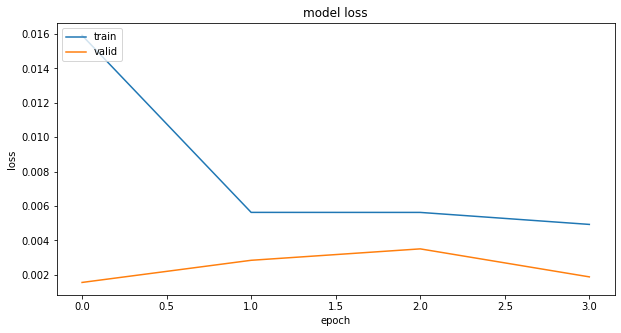

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_GRU.history['loss'])
plt.plot(history_GRU.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
predict_GRU=GRU_model.predict(x_test_multi)
mse_GRU= mean_squared_error(y_test_multi, predict_GRU)
print(predict_GRU.shape)
print(mse_GRU)

(163, 1)
0.003321778547952153


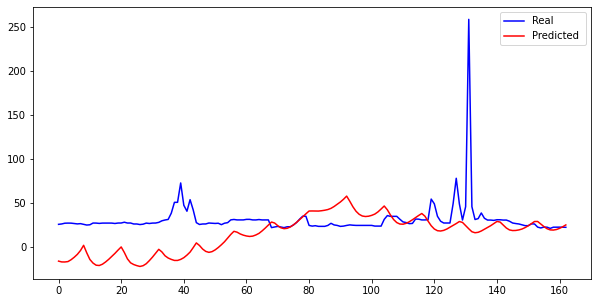

In [ ]:
predict_GRU_inv=scaler_y.inverse_transform(predict_GRU)
fig = plt.figure(figsize = (10, 5))
plt.plot(y_test_multi_inv[:, 0], color='b', label='Real ')
plt.plot(predict_GRU_inv[:, 0], color='r', label='Predicted ')
plt.legend()

##**CNN**

In [ ]:
from keras.layers import BatchNormalization
CNN_model= Sequential()
CNN_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=x_train_multi.shape[-2:]))
# CNN_model.add(Dropout(0.2))
# CNN_model.add(BatchNormalization())
# CNN_model.add(MaxPooling1D(pool_size=2))
# CNN_model.add(BatchNormalization())
# CNN_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
# CNN_model.add(Dropout(0.2))
# CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling1D(pool_size=3))
# CNN_model.add(BatchNormalization())
CNN_model.add(Flatten())
CNN_model.add(Dense(64, activation='relu'))
CNN_model.add(Dropout(0.2))
# CNN_model.add(BatchNormalization())
CNN_model.add(Dense(n_step,activation='selu'))
CNN_model.compile(loss='mse', optimizer='adam')

In [ ]:
history_CNN=CNN_model.fit(x_train_multi,
                          y_train_multi,
                          epochs=50,
                          batch_size=16,
                          validation_data=(x_valid_multi,y_valid_multi),
                          callbacks=[callback])

Epoch 1/50
32/32 [==============================] - 1s 8ms/step - loss: 0.0980 - val_loss: 0.0227
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0249 - val_loss: 0.0048
Epoch 3/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0101 - val_loss: 0.0040
Epoch 4/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0069 - val_loss: 0.0034
Epoch 5/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0059 - val_loss: 0.0032
Epoch 6/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0052 - val_loss: 0.0034
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0035
Epoch 8/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0050 - val_loss: 0.0036


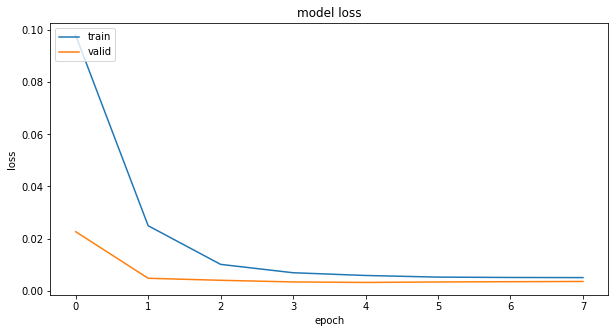

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
predict_CNN=CNN_model.predict(x_test_multi)
mse_CNN= mean_squared_error(y_test_multi, predict_CNN)
print(predict_CNN.shape)
print(mse_CNN)

(163, 1)
0.018751453192846265


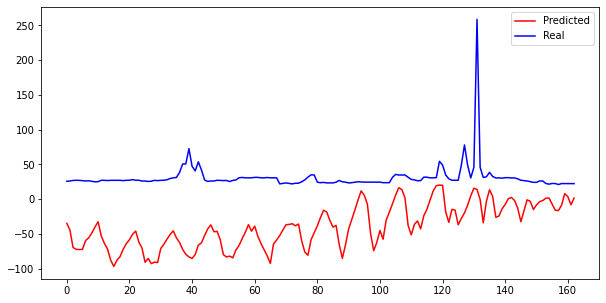

In [ ]:
predict_CNN_inv=scaler_y.inverse_transform(predict_CNN)
fig = plt.figure(figsize = (10, 5))
plt.plot(predict_CNN_inv[:, 0], color='r', label='Predicted')
plt.plot(y_test_multi_inv[:, 0], color='b', label='Real')
plt.legend()

#**Result Comparision**

In [ ]:
result_ML={'Mlp': mse_MLP,
           'Simple RNN': mse_RNN,
           'LSTM': mse_LSTM,
           'GRU': mse_GRU,
           'CNN':mse_CNN
           }
result_ML=pd.DataFrame.from_dict(result_ML, orient='index', columns=list(['MSE']))
result_ML

,MSE
Mlp,0.002245
Simple RNN,0.007851
LSTM,0.001476
GRU,0.003322
CNN,0.018751


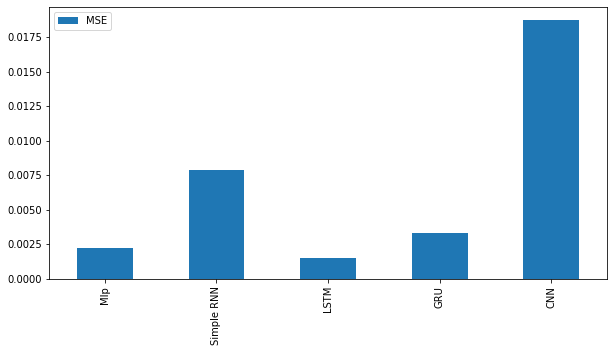

In [ ]:
result_ML.plot(kind='bar',figsize=(10, 5))